# 1. Описание проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.



### 2. Загрузка данных и подготовка к анализу

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import seaborn as sns
import os

sns.set(rc={'figure.figsize':(17,8)}) #Зададим размер фигур построеных с помощью seaborn
np.set_printoptions(threshold=np.inf)
sns.set_palette('dark')
pd.set_option('display.max_columns', None) #Уберем ограничение на максимальное число отображаемых столбцов за раз

In [3]:
pth1_1 = 'visits_info_short.csv'
pth1_2 = 'orders_info_short.csv'
pth1_3 = 'costs_info_short.csv'
pth2_1 = '/datasets/visits_info_short.csv'
pth2_2 = '/datasets/orders_info_short.csv'
pth2_3 = '/datasets/costs_info_short.csv'
if os.path.exists(pth1_1):
    visits = pd.read_csv(pth1_1)
    orders = pd.read_csv(pth1_2)
    costs = pd.read_csv(pth1_3)
elif os.path.exists(pth2_1):
    visits = pd.read_csv(pth2_1)
    orders = pd.read_csv(pth2_2)
    costs = pd.read_csv(pth2_3)
else:
    print('Что-то пошло не так')

In [4]:
display(visits) #Отобразим каждый датафрейм и информацию по нему
visits.info()
display(orders)
orders.info()
display(costs)
costs.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Нужно сделать следующее

Таблица `visits`
- Перевести все названия столбцов в snake case
- Region - проверить на неявные дубликаты
- Device - проверить на неявные дубликаты
- Channel - проверить на неявные дубликаты
- Session Start - перевести тип в datetime
- Session End - перевести тип в datetime

Таблица `orders`
- Перевести все названия столбцов в snake case
- Event Dt - перевести тип в datetime
- Revenue - Проверить уникальные значения

Таблица `costs`
- Перевести все названия столбцов в snake case
- dt - перевести тип в datetime
- Channel - проверить на неявные дубликаты

In [5]:
#Приведем названия столбцов к snake case
visits = visits.rename(columns={'User Id':'user_id','Region':'region','Device':'device','Channel':'channel','Session Start':'session_start','Session End':'session_end'})
orders = orders.rename(columns={'User Id':'user_id','Event Dt':'event_dt','Revenue':'revenue'})
costs = costs.rename(columns={'Channel':'channel'})

In [6]:
#Отобразим уникальные значения во всех столбцах где могут быть неявные дубликаты
print(visits['region'].unique())
print()
print(visits['device'].unique())
print()
print(visits['channel'].unique())
print()
print(orders['revenue'].unique())
print()
print(costs['channel'].unique())

['United States' 'UK' 'France' 'Germany']

['iPhone' 'Mac' 'Android' 'PC']

['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']

[ 4.99  5.99  9.99 49.99 19.99]

['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


In [7]:
#Приведем даты к datetime
costs['dt'] = pd.to_datetime(costs['dt'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
costs['dt'] = costs['dt'].dt.date
orders['event_dt'] = orders['event_dt'].dt.date
visits['session_start'] = visits['session_start'].dt.date
visits['session_end'] = visits['session_end'].dt.date

In [8]:
print("Длина датафрейма costs до удаления дубликатов:", len(costs)) #Выведем длину датафрейма до удаления
costs = costs.drop_duplicates().reset_index(drop=True) #Удалим все дубликаты строк и обновим индексацию
print("Длина датафрейма costs после удаления дубликатов:", len(costs)) #Выведем длину датафрейма после удаления

print("Длина датафрейма orders до удаления дубликатов:",len(orders)) #Выведем длину датафрейма до удаления
orders = orders.drop_duplicates().reset_index(drop=True) #Удалим все дубликаты строк и обновим индексацию
print("Длина датафрейма orders после удаления дубликатов:",len(orders)) #Выведем длину датафрейма после удаления

print("Длина датафрейма visits до удаления дубликатов:",len(visits)) #Выведем длину датафрейма до удаления
visits = visits.drop_duplicates().reset_index(drop=True) #Удалим все дубликаты строк и обновим индексацию
print("Длина датафрейма visits после удаления дубликатов:",len(visits)) #Выведем длину датафрейма после удаления

Длина датафрейма costs до удаления дубликатов: 1800
Длина датафрейма costs после удаления дубликатов: 1800
Длина датафрейма orders до удаления дубликатов: 40212
Длина датафрейма orders после удаления дубликатов: 40210
Длина датафрейма visits до удаления дубликатов: 309901
Длина датафрейма visits после удаления дубликатов: 309901


Типы изменены, неявные дубликаты отсуствтуют. Данные готовы к анализу

### 3. Задание функций для расчета и анализа LTV, ROI, удержания и конверсии

#### Зададим функцию для получения профиля пользователей

In [9]:
events = None

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts']
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


#### Зададим функцию для расчета LTV, ROI

In [10]:

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )



#### Зададим функцию для построения графиков LTV

In [11]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Зададим функцию для получения Retention rate

In [12]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Зададим функцию для построения графиков удержания

In [14]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()


#### Зададим функцию для получения конверсии

In [15]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Зададим функцию для построения графиков конверсии

In [16]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### 4. Исследовательский анализ данных

Построим профили пользователей для дальнейшей их обработки. Определим минимальную и максимальную дату привлечения пользователей.

In [19]:
profiles = get_profiles(visits, orders, events, costs) #Вызовем функцию get_profiles
display(profiles)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [20]:
print('Максимальная дата привлечения:',profiles['first_ts'].max())
print('Минимальная дата привлечения:',profiles['first_ts'].min())

Максимальная дата привлечения: 2019-10-27
Минимальная дата привлечения: 2019-05-01


#### Динамика привлечения пользователей

#### Задача: Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?

In [21]:
region_payer = profiles.groupby('region').agg({'payer':'mean'}).sort_values('payer',ascending=False) #Создадим таблицу c платящими пользователи по регионам
region_payer['payer'] = region_payer['payer'] * 100 #Переведем долю в проценты
region_all = profiles.groupby('region').agg({'user_id':'count'}).sort_values('user_id',ascending=False) #Создадим таблицу со всеми пользователями по регионам
display(region_payer)
display(region_all)

,payer
region,
United States,6.901862
Germany,4.111875
UK,3.982930
France,3.799427


,user_id
region,
United States,100002
UK,17575
France,17450
Germany,14981


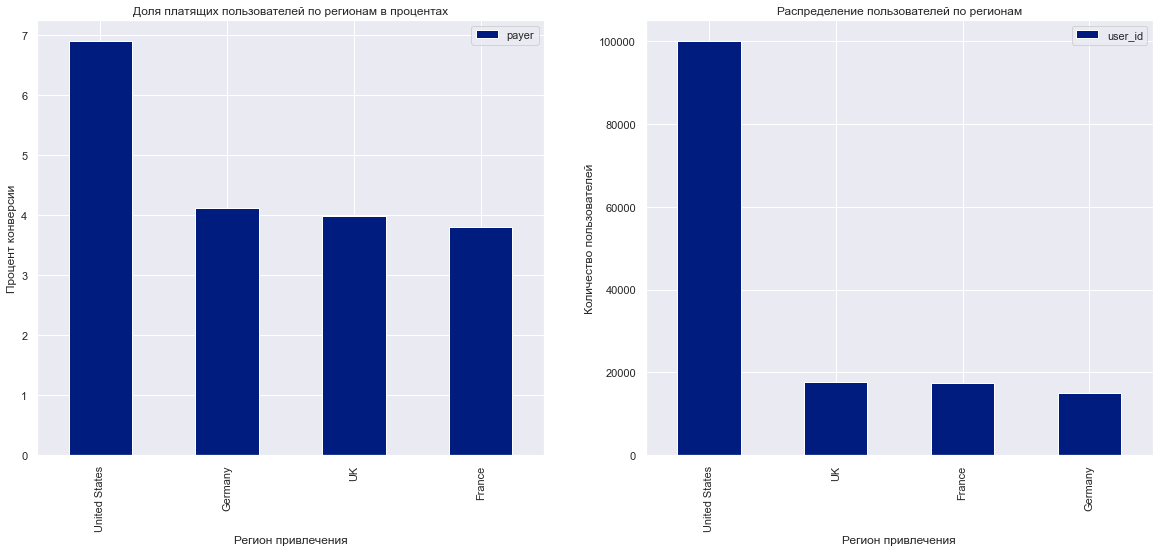

In [22]:
plt.figure(figsize = (20, 8)) #Зададим размер графика
region_payer.plot(kind='bar', ax=plt.subplot(1,2,1), grid=True) #Построим график по платящим пользователям
plt.xlabel('Регион привлечения')
plt.ylabel('Процент конверсии')
plt.title('Доля платящих пользователей по регионам в процентах')
region_all.plot(kind='bar', ax=plt.subplot(1,2,2), grid=True) #Построим график по всем пользователям
plt.xlabel('Регион привлечения')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по регионам')
plt.show()

#### Вывод

Больше всего пользователей в США и именно там самая платящая аудитория. При этом второй по платежеспособности регион это Германия, в котором при этом самое низкое количество пользователей, однако в целом, мы можем сказать, что страны Европы идут друг к другу очень близко

#### Задача: Какими устройствами посетители пользуются? С каких устройств чаще всего заходят платящие пользователи?

In [23]:
device_payer = profiles.groupby('device').agg({'payer':'mean'}).sort_values('payer',ascending=False) #Создадим таблицу c платящими пользователями по устройствам
device_payer['payer'] = device_payer['payer'] * 100 #Переведем долю в проценты
device_all = profiles.groupby('device').agg({'user_id':'count'}).sort_values('user_id',ascending=False) #Создадим таблицу c пользователями по устройствам
display(device_payer)
display(device_all)

,payer
device,
Mac,6.364423
iPhone,6.207897
Android,5.851793
PC,5.046790


,user_id
device,
iPhone,54479
Android,35032
PC,30455
Mac,30042


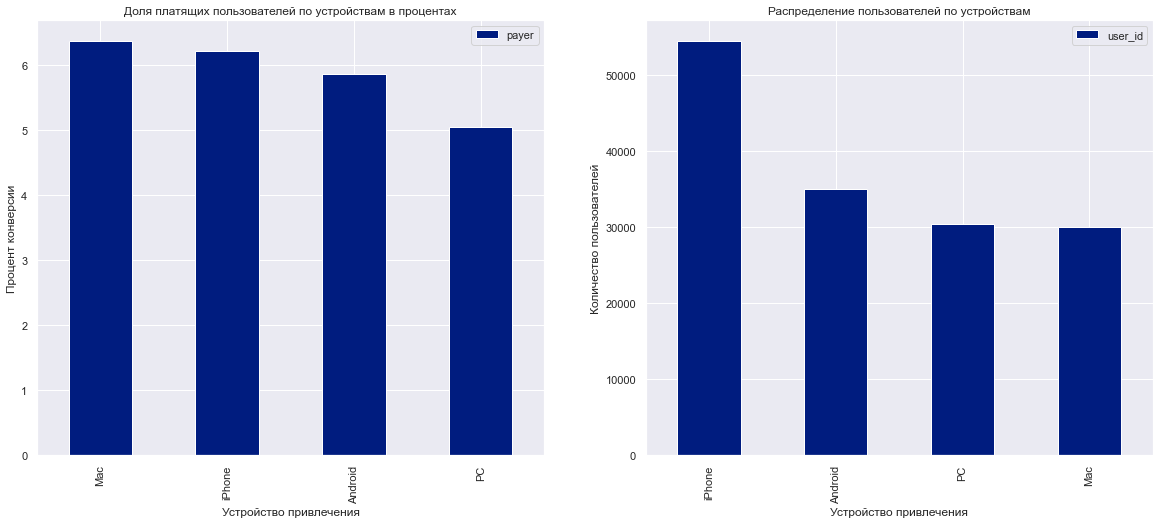

In [24]:
plt.figure(figsize = (20, 8)) #Зададим размер графика
device_payer.plot(kind='bar', ax=plt.subplot(1,2,1), grid=True) #Построим график по платящим пользователям устройств
plt.xlabel('Устройство привлечения')
plt.ylabel('Процент конверсии')
plt.title('Доля платящих пользователей по устройствам в процентах')
device_all.plot(kind='bar', ax=plt.subplot(1,2,2), grid=True) #Построим график по всем устройствам
plt.xlabel('Устройство привлечения')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по устройствам')
plt.show()

#### Вывод
Самая платящая аудитория на Mac, при том, что меньше всего пользователей именно на этой платформе, при этом число пользователей на Iphone хоть и самое большое но всего лишь второе по платящим пользователям. 
На PC при близком с Mac количестве пользователей, доля платящих пользователей меньше на 1%, т.е 5% вместо 6%

#### Задача: По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

In [25]:
channel_payer = profiles.groupby('channel').agg({'payer':'mean'}).sort_values('payer',ascending=False) #Создадим таблицу c платящими пользователями по каналам
channel_payer['payer'] = channel_payer['payer'] * 100 #Переведем долю в проценты
channel_all = profiles.groupby('channel').agg({'user_id':'count'}).sort_values('user_id',ascending=False) #Создадим таблицу со всеми пользователями по каналам
display(channel_payer)
display(channel_all)


,payer
channel,
FaceBoom,12.204914
AdNonSense,11.340206
lambdaMediaAds,10.469986
TipTop,9.600736
RocketSuperAds,7.913669
WahooNetBanner,5.296387
YRabbit,3.826531
MediaTornado,3.574702
LeapBob,3.063253


,user_id
channel,
organic,56439
FaceBoom,29144
TipTop,19561
OppleCreativeMedia,8605
LeapBob,8553
WahooNetBanner,8553
RocketSuperAds,4448
MediaTornado,4364
YRabbit,4312


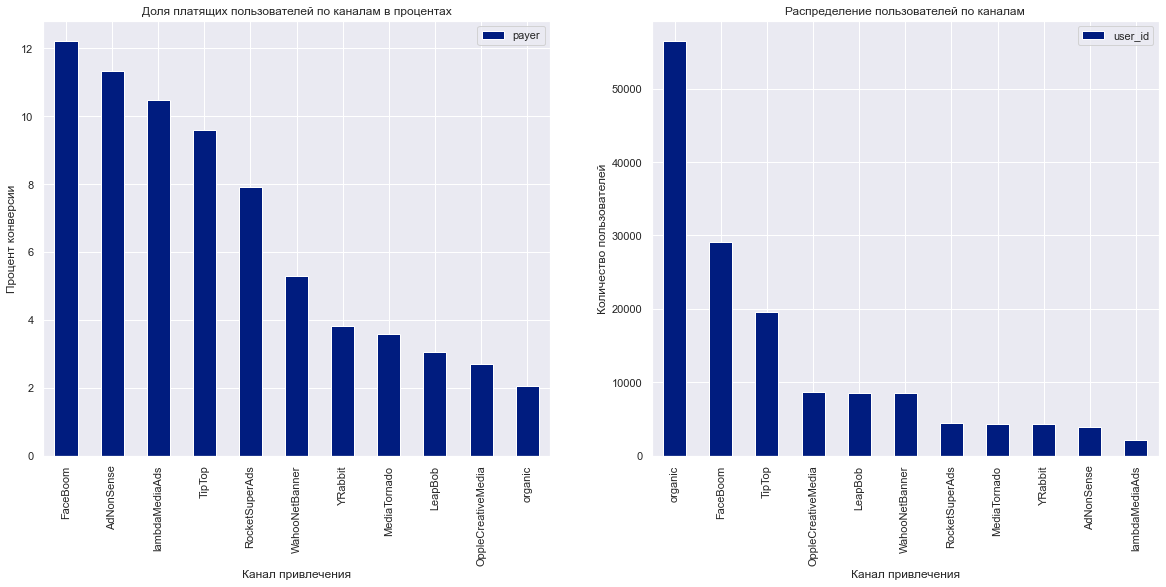

In [26]:
plt.figure(figsize = (20, 8)) #Зададим размер графика
channel_payer.plot(kind='bar', ax=plt.subplot(1,2,1), grid=True) #Построим график платящих пользователей
plt.xlabel('Канал привлечения')
plt.ylabel('Процент конверсии')
plt.title('Доля платящих пользователей по каналам в процентах')
channel_all.plot(kind='bar', ax=plt.subplot(1,2,2), grid=True) #Построим график по всем пользователям
plt.xlabel('Канал привлечения')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по каналам')
plt.show()

#### Вывод 
Мы можем увидеть, что самое большое число пользователей пришло из органического трафика, однако у него самый маленький процент платежей. Это хорошая точка роста, но нужно оценить реальную стоимость затрат органического трафика (SEO, работа в соц сетях, работа на узнаваемостью бренда).
Лучшим каналом привлечения в рамках конверсии оказался FaceBoom, а худшим OppleCreativeMedia. Стоит так же обратить внимание на канал LambdaMediaAds, несмотря на маленький объем трафика он занимает третье место по конверсии.

### Общий вывод по пункту 4.
Больше всего пользователей в США и именно там самая платящая аудитория. При этом второй по платежеспособности регион это Германия, в котором при этом самое низкое количество пользователей, однако в целом, мы можем сказать, что страны Европы идут друг к другу очень близко

Самая платящая аудитория на Mac, при том, что меньше всего пользователей именно на этой платформе, при этом число пользователей на Iphone хоть и самое большое но всего лишь второе по платящим пользователям. 
На PC при близком с Mac количестве пользователей, доля платящих пользователей меньше на 1%, т.е 5% вместо 6%

Мы можем увидеть, что самое большое число пользователей пришло из органического трафика, однако у него самый маленький процент платежей. Это хорошая точка роста, но нужно оценить реальную стоимость затрат органического трафика (SEO, работа в соц сетях, работа на узнаваемостью бренда).
Лучшим каналом привлечения в рамках конверсии оказался FaceBoom, а худшим OppleCreativeMedia. Стоит так же обратить внимание на канал LambdaMediaAds, несмотря на маленький объем трафика он занимает третье место по конверсии.

### 5. Анализ маркетинга

#### Задача: Оценим затраты на маркетинг в разрере: всего/ по источникам/ по времени

In [27]:
display(profiles)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [28]:

print('Общие затраты на рекламу составили:',int(profiles['acquisition_cost'].sum())) 

Общие затраты на рекламу составили: 105497


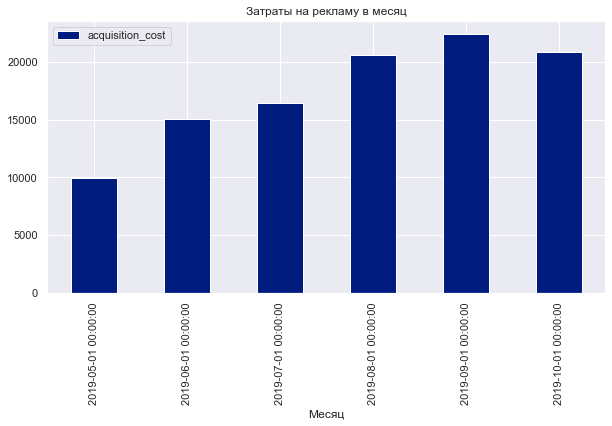

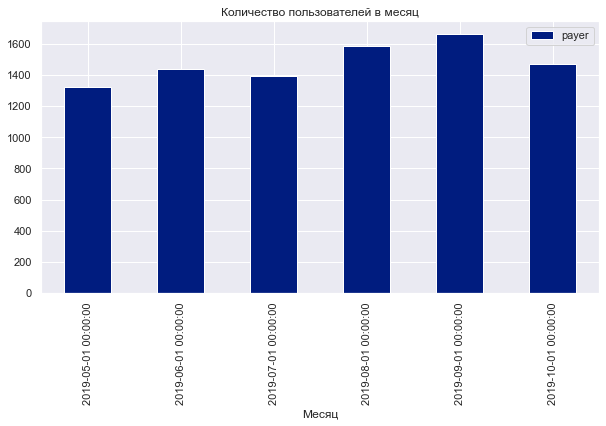

In [29]:

#Построим график с общими затратами за месяц
profiles.groupby('month').agg({'acquisition_cost':'sum'}).plot.bar(grid=True, figsize=(10,5)) #Отсортируем индекс и построим график
plt.title('Затраты на рекламу в месяц')
plt.xlabel('Месяц')

#Построим график с привлеченными платящими пользователями за месяц
profiles.groupby('month').agg({'payer':'sum'}).plot.bar(grid=True, figsize=(10,5)) #Посчитаем количество платящих пользователей по месяцами
plt.title('Количество пользователей в месяц')
plt.xlabel('Месяц')
plt.show()



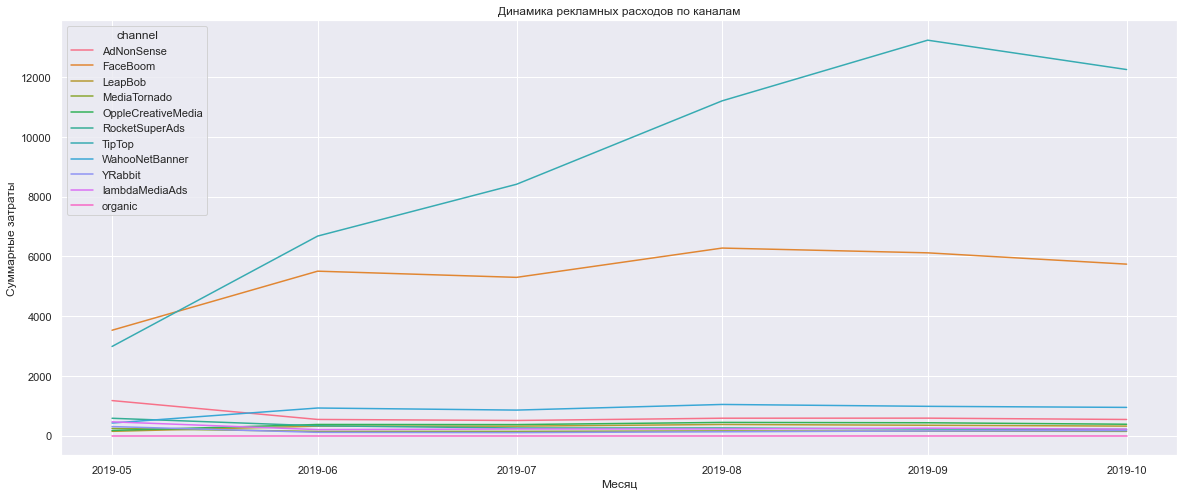

In [30]:
c = profiles.pivot_table(index=['month','channel'], values='acquisition_cost', aggfunc='sum')
plt.figure(figsize = (20, 8)) #Зададим размер графика
plt.title('Динамика рекламных расходов по каналам')
plt.xlabel('Месяц')
plt.ylabel('Суммарные затраты')
sns.lineplot(x='month', y='acquisition_cost', data=c, hue='channel')
plt.show()

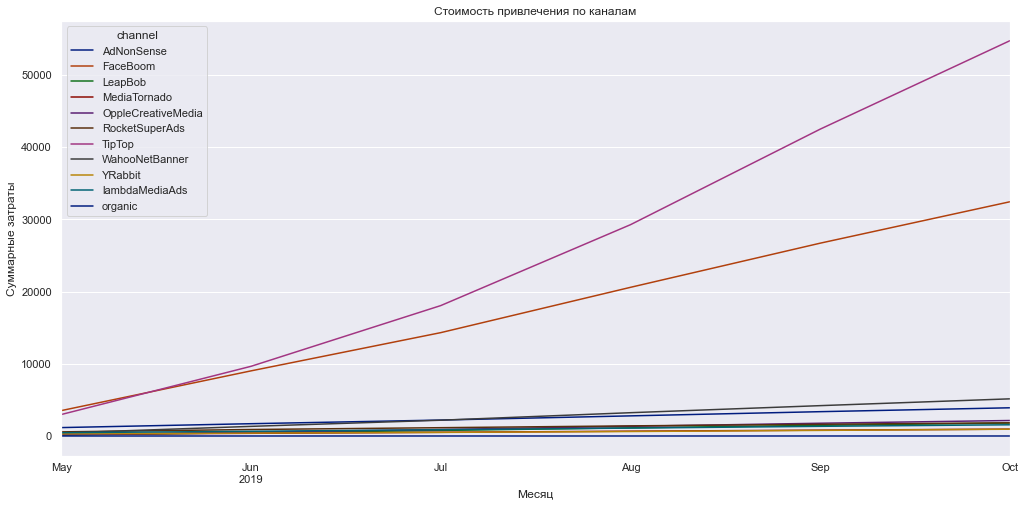

In [33]:
profiles.pivot_table(index=['month'], columns='channel', values='acquisition_cost', aggfunc='sum').cumsum(axis=0).plot(grid=True)
plt.title('Стоимость привлечения по каналам')
plt.xlabel('Месяц')
plt.ylabel('Суммарные затраты')
plt.show()

In [34]:
display(profiles.pivot_table(index=['channel'], values='acquisition_cost', aggfunc='sum').sort_values(by='acquisition_cost',ascending=False))

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Как мы можем увидеть по месяцам, меньше всего затрат на рекламу в мае, а больше всего в сентябре. 
При этом действительно можно увидеть корреляцию между увеличением рекламного бюджета и количеством пользователей, однако например при сравнении бюджета мая и июля с количеством привлеченных пользователей, можно сделать вывод, что количество привлеченных платящих пользователей снизилось при увеличении бюджета, что свидетельствует о неэффективном использовании средств.

Так же самые высокие затраты по каналам TipTop и FaceBoom. При этом рост затрат начался почти с июня, что является самым началом изучаемого периода

#### Задача: Сколько в среднем стоило привлечение одного покупателя из каждого источника? Какая общая стоимость привлечения?

In [35]:
channel = profiles.groupby('channel').agg({'payer':'sum','user_id':'count','acquisition_cost':'sum'}) #Посчитаем число платящих пользователей и общее число пользоватеелй по каналу привлечения
channel['cac'] = round(channel['acquisition_cost'] / channel['payer'],2) #Расчитаем CAC для каждого канала
channel['conv'] = round((channel['payer'] / channel['user_id']) * 100,2) #Расчитаем конверсию для каждого канала

print('Общее значение CAC =',round((channel['acquisition_cost'].sum() / channel['payer'].sum()),2)) #Выведем общую стоимость привлечения
display(channel[['cac','conv']].sort_values(by='conv',ascending=False)) #Выведем таблицу с наглядным отображением CAC и конверсии

Общее значение CAC = 11.88


,cac,conv
channel,,
FaceBoom,9.12,12.20
AdNonSense,8.89,11.34
lambdaMediaAds,6.92,10.47
TipTop,29.15,9.60
RocketSuperAds,5.21,7.91
WahooNetBanner,11.37,5.30
YRabbit,5.72,3.83
MediaTornado,6.12,3.57
LeapBob,6.86,3.06


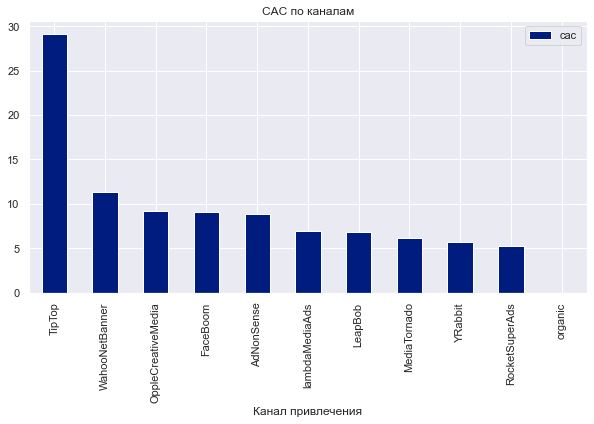

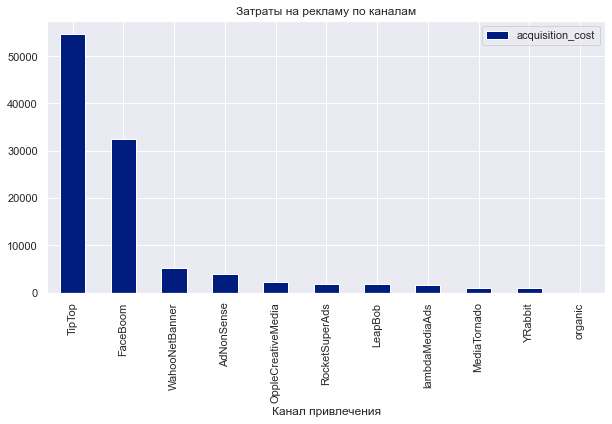

In [36]:
#Построим график с CAC по каналам
channel.drop(columns=['payer','acquisition_cost','user_id','conv']).sort_values('cac',ascending=False).plot.bar(grid=True, figsize=(10,5))
plt.title('CAC по каналам')
plt.xlabel('Канал привлечения')
#Построим график с общими затратами на рекламу по каналам
channel.drop(columns=['payer','cac','user_id','conv']).sort_values('acquisition_cost',ascending=False).plot.bar(grid=True, figsize=(10,5))
plt.title('Затраты на рекламу по каналам')
plt.xlabel('Канал привлечения')
plt.show()

Мы можем сделать следующий вывод самый дорогой канал для привлечения и в качестве вложений в него это TipTop при этом он является четвертым по показателю конверсии.
Стоит уменьшить затраты на этот канал и сосредоточиться на FaceBoom, AdNonSense, LambdaMediaAds. У них меньше CAC но больше конверсия

### Общий вывод по пункту 5.

Как мы можем увидеть по месяцам, меньше всего затрат на рекламу в мае, а больше всего в сентябре. 
При этом действительно можно увидеть корреляцию между увеличением рекламного бюджета и количеством пользователей, однако например при сравнении бюджета мая и июля с количеством привлеченных пользователей, можно сделать вывод, что количество привлеченных платящих пользователей снизилось при увеличении бюджета, что свидетельствует о неэффективном использовании средств.

Так же самые высокие затраты по каналам TipTop и FaceBoom. При этом рост затрат начался почти с июня, что является самым началом изучаемого периода

Мы можем сделать следующий вывод самый дорогой канал для привлечения и в качестве вложений в него это TipTop при этом он является четвертым по показателю конверсии.
Стоит уменьшить затраты на этот канал и сосредоточиться на FaceBoom, AdNonSense, LambdaMediaAds. У них меньше CAC но больше конверсия

### 6. Оценка окупаемости рекламы для привлечения пользователей

#### Задача 1. Анализ общей окупаемости рекламы

In [37]:
profiles = profiles.query('channel != "organic"')
observation_date = pd.to_datetime('2019-11-01')
analysis_horizon = 14

D:\anacondas\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


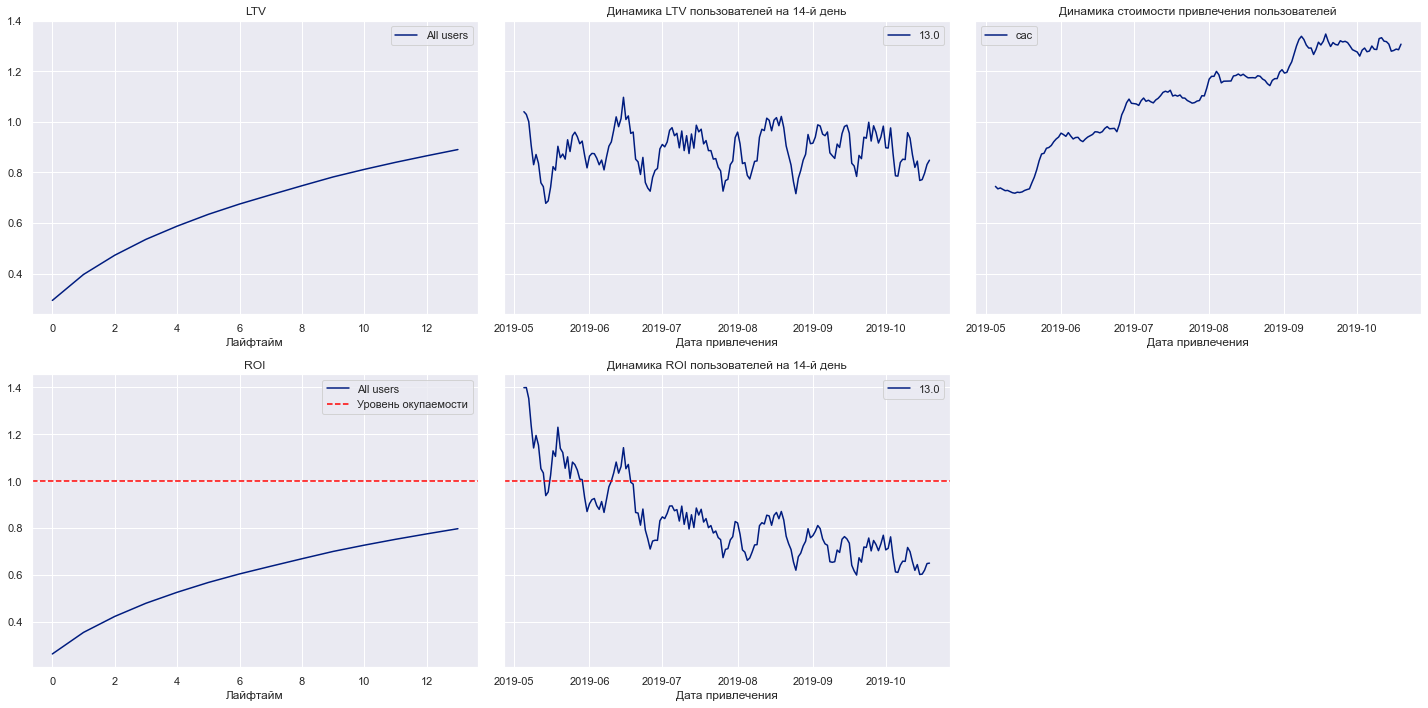

In [38]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, analysis_horizon) #Вызовем функцию для расчета LTV и ROI по всем пользователям
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=5) #Построим графики с помощью функции с окном сглаживания 5

#### Вывод
Как мы можем увидеть что общая стоимость привлечения пользователя растет с каждым месяцем, при этом окупаемость пользователя на период 14 дней уже в июле падает ниже окупаемости.
Общий ROI не доходит до единицы что говорит о том, что реклама не окупается

#### Задача 2. Анализ окупаемости рекламы по каналам

D:\anacondas\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


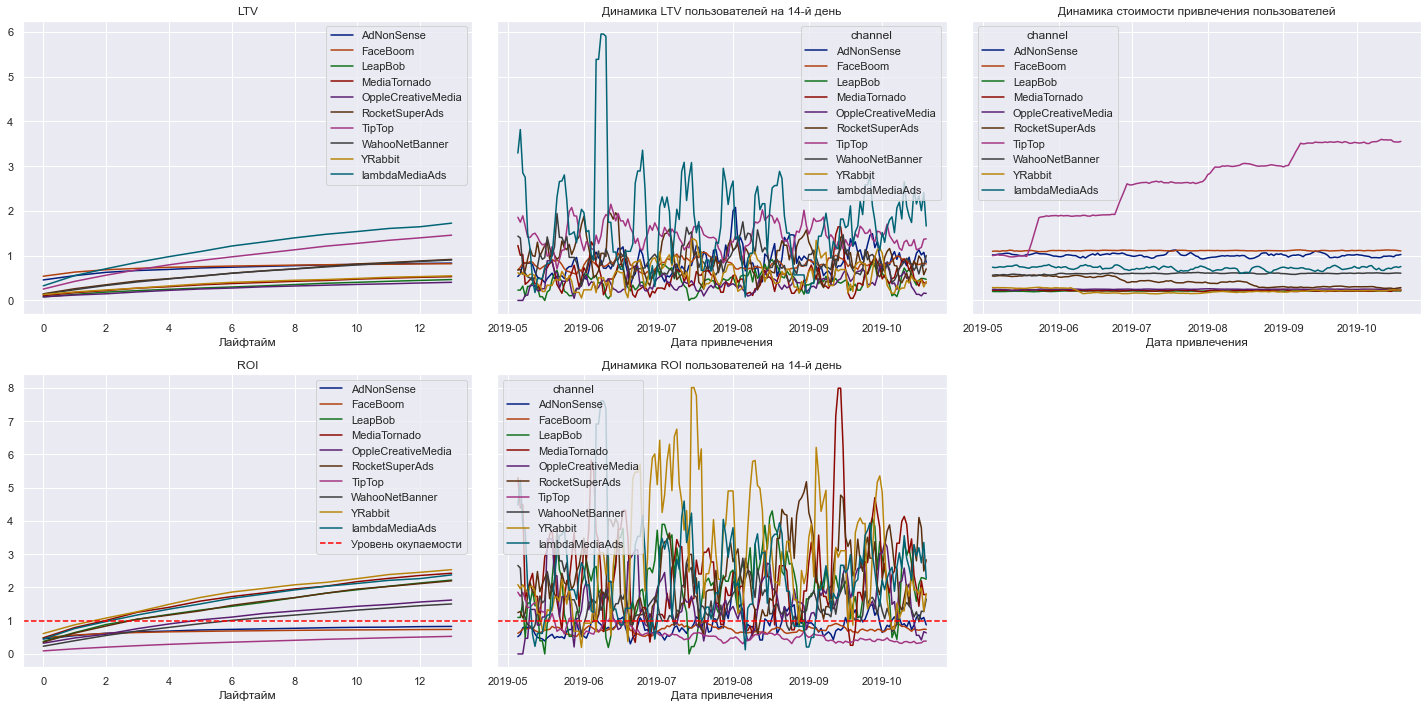

In [39]:
#Расчитаем LTV и ROI c разбивкой по каналам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['channel']
)
#Строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=5) 

#### Вывод
TipTop - причина по которой стоимость привлечения растет каждый месяц, при этом реклама на FaceBoom, TipTop, AdNonSense не окупается, учитывая затраты на TipTop и FaceBoom они и тянут весь маркетинг за собой.

#### Задача 3. Анализ окупаемости рекламы по устройствам

D:\anacondas\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


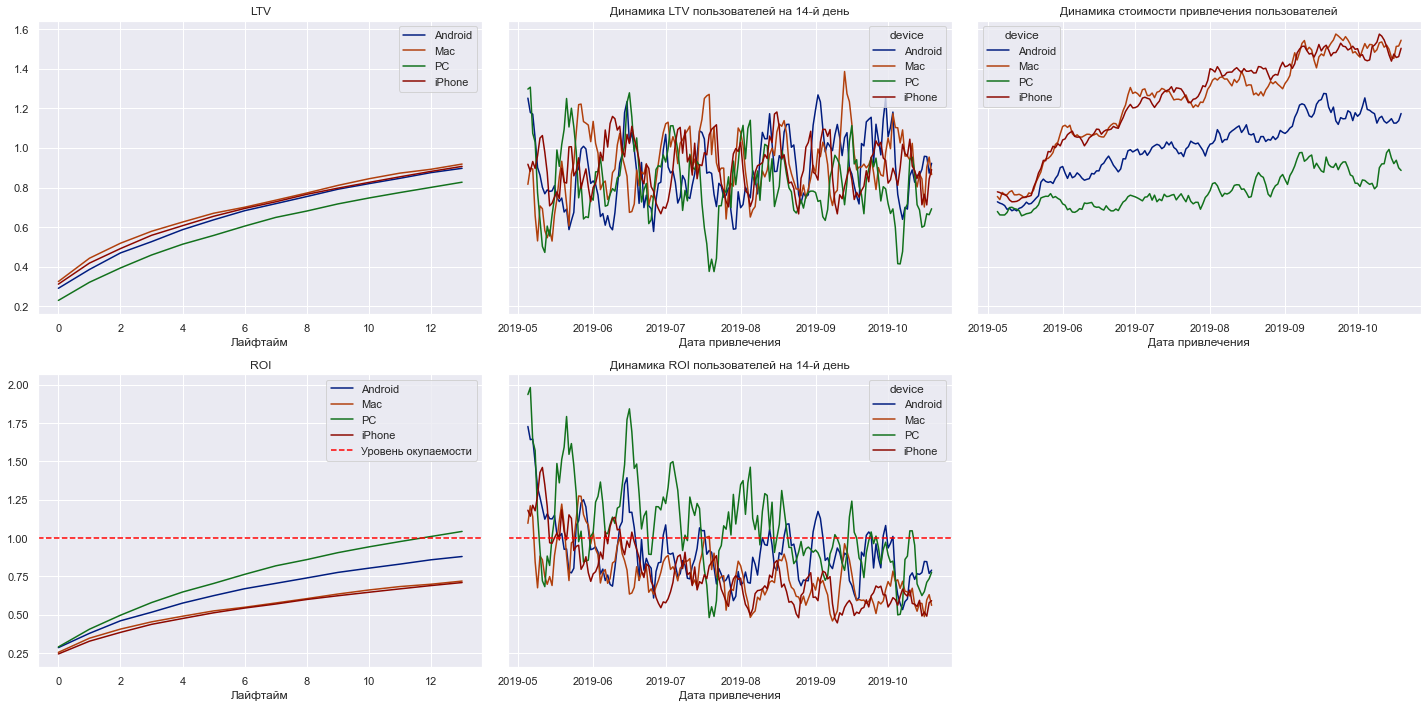

In [40]:
#Расчитаем LTV и ROI c разбивкой по устройствам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['device']
)
#Строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=5) 

#### Вывод
Реклама начинает окупаться на конец лайфтайма пользователя только на PC. На остальных устройствах реклама не окупается, при этом стоимость привлечения пользователей для android, iphone, mac только растет

#### Задача 4. Анализ окупаемости рекламы по регионам

D:\anacondas\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


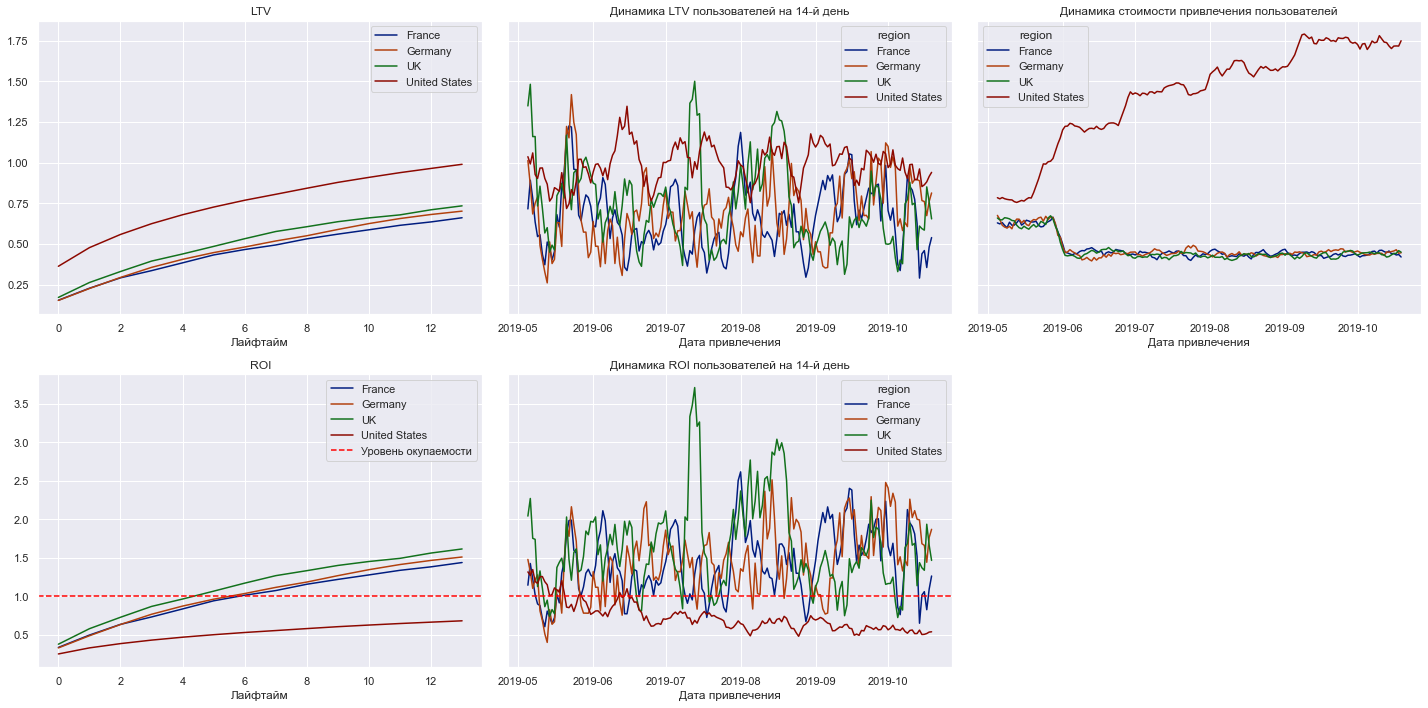

In [41]:
#Расчитаем LTV и ROI c разбивкой по устройствам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['region']
)
#Строим графики
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=5) 

#### Вывод
Мы видим, что реклама выросла именно по США и именно в этой стране реклама не окупается. При этом стоимость привлечения в других странах с начала периода даже упала.

#### Общие выводы по 1-4
Как мы можем увидеть что общая стоимость привлечения пользователя растет с каждым месяцем, при этом окупаемость пользователя на период 14 дней уже в июле падает ниже окупаемости.
Общий ROI не доходит до единицы что говорит о том, что реклама не окупается

TipTop - причина по которой стоимость привлечения растет каждый месяц, при этом реклама на FaceBoom, TipTop, AdNonSense не окупается, учитывая затраты на TipTop он и тянет весь маркетинг за собой.

Реклама начинает окупаться на конец лайфтайма пользователя только на PC. На остальных устройствах реклама не окупается, при этом стоимость привлечения пользователей для android, iphone, mac только растет

Мы видим, что реклама выросла именно по США и именно в этой стране реклама не окупается

#### Задача 5. Проанализируем общее удержание и конверсию

D:\anacondas\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


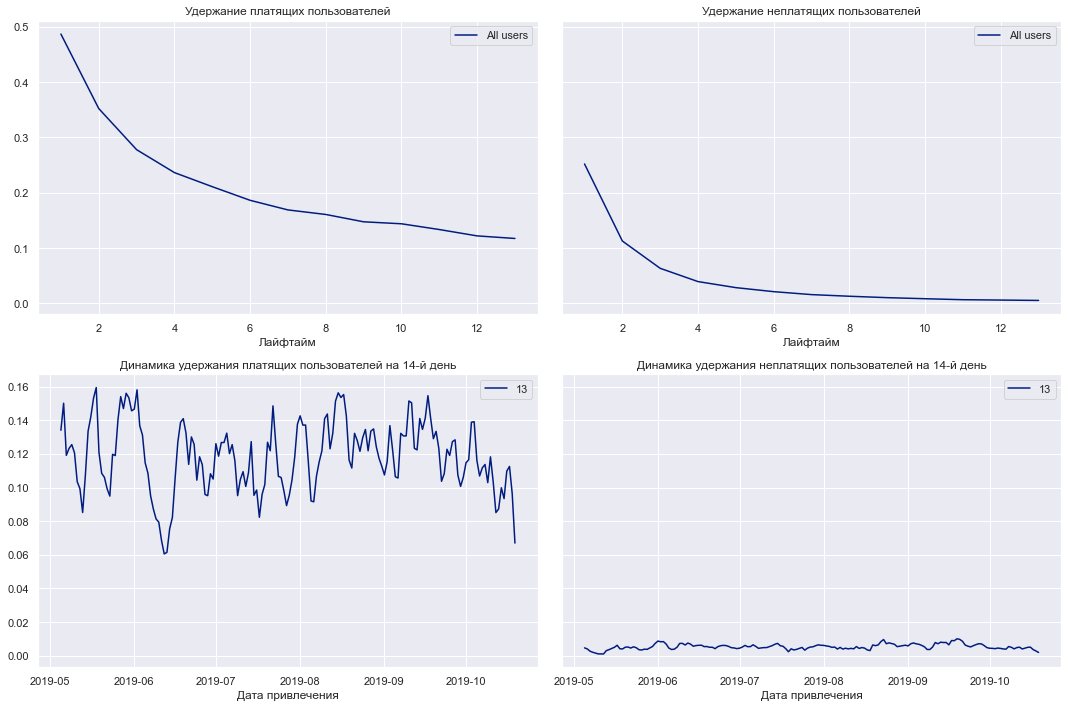

In [42]:
retention_raw, retention, retention_history = get_retention(profiles, visits, 
                                                            observation_date, analysis_horizon)
#Построим графики
plot_retention(retention, retention_history, analysis_horizon, window=5) 

D:\anacondas\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


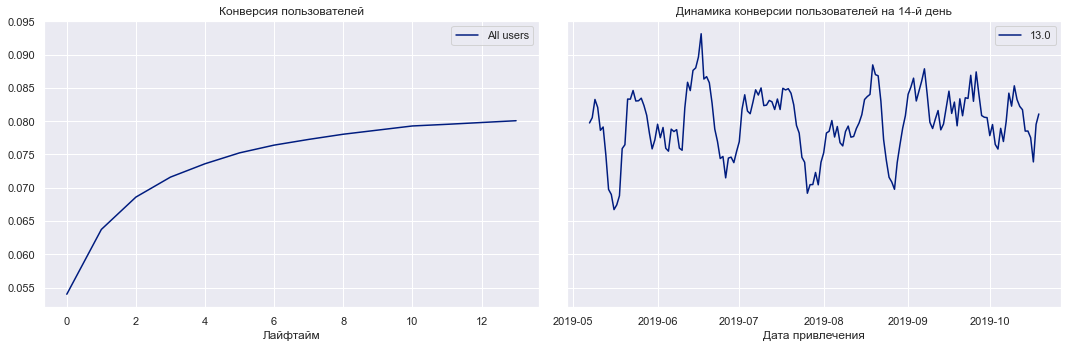

In [43]:
#Расчитаем конверсию 
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon
)
plot_conversion(conversion, conversion_history, analysis_horizon, window=7) 

#### Вывод 

Проблем с кривыми удержания нет, нужно посмотреть на удержание в разбивке по каналам/устройствам/странам. 
Кривая конверсии перестает явно стремиться к единице, что говорит о проблемах с продажами

#### Задача 6. Проанализируем удержание и конверсию в разбивке по каналам

D:\anacondas\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


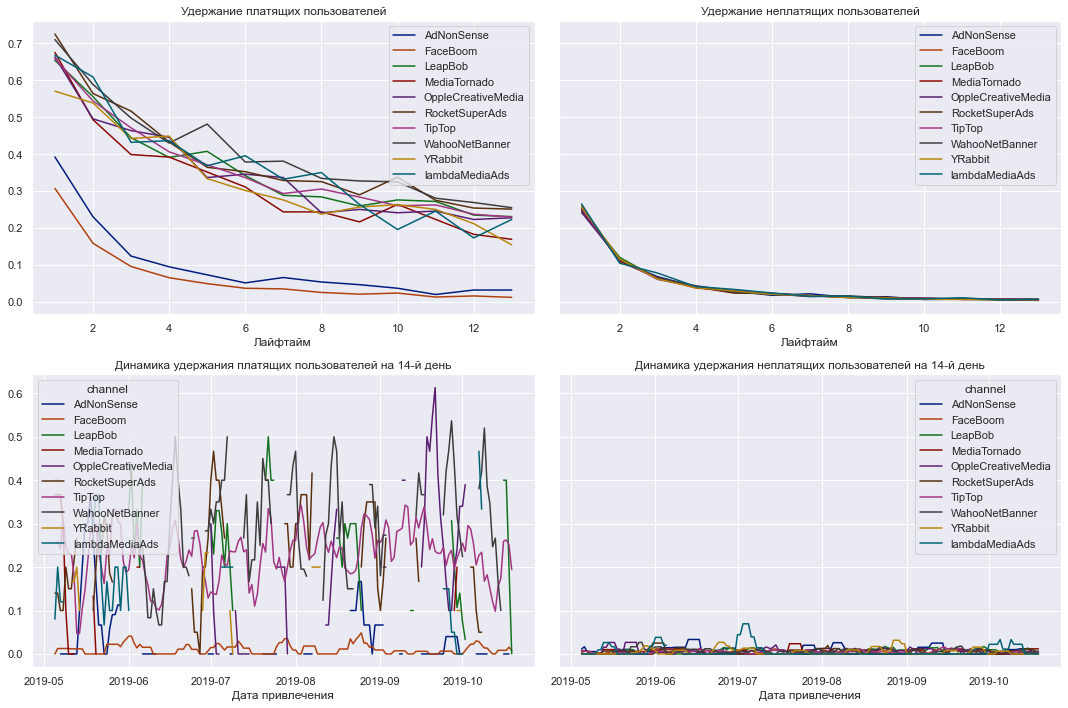

In [44]:
#Расчитаем удержание
retention_raw, retention, retention_history = get_retention(profiles, visits, 
                                                            observation_date, analysis_horizon, dimensions=['channel'])
plot_retention(retention, retention_history, 14, window=5) 

D:\anacondas\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


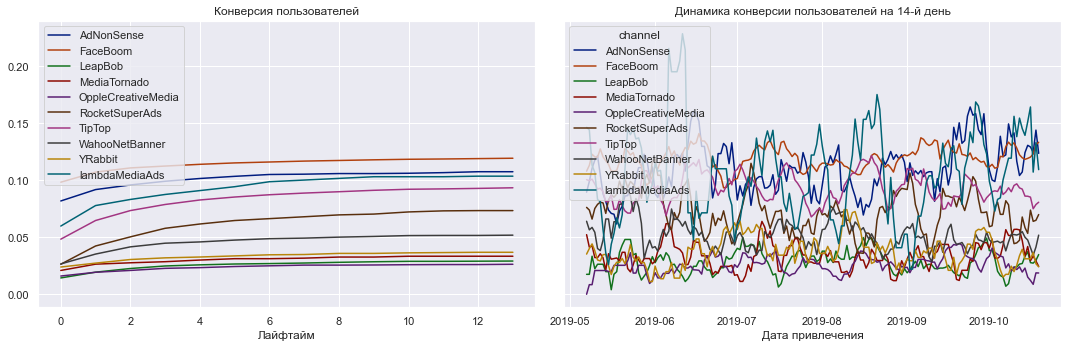

In [45]:
#Расчитаем конверсию 
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions = ['channel']
)
plot_conversion(conversion, conversion_history, analysis_horizon, window=7) 

#### Вывод 
Мы можем увидеть что удержание  платящих пользователей привлеченных через каналы FaceBoom и AdNonSence на уровне не платящих пользователей, что говорит о проблемах с трафиком привлеченном через эти каналы.
При этом несмотря на удержание у AdNonSence и FaceBoom хорошая конверсия. Так же хорошая конверсия у LambdaMediaAds. С учетом CAC и удержания это потенциально хороший канал.

#### Задача 7. Проанализируем удержание и конверсию в разбивке по странам

D:\anacondas\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


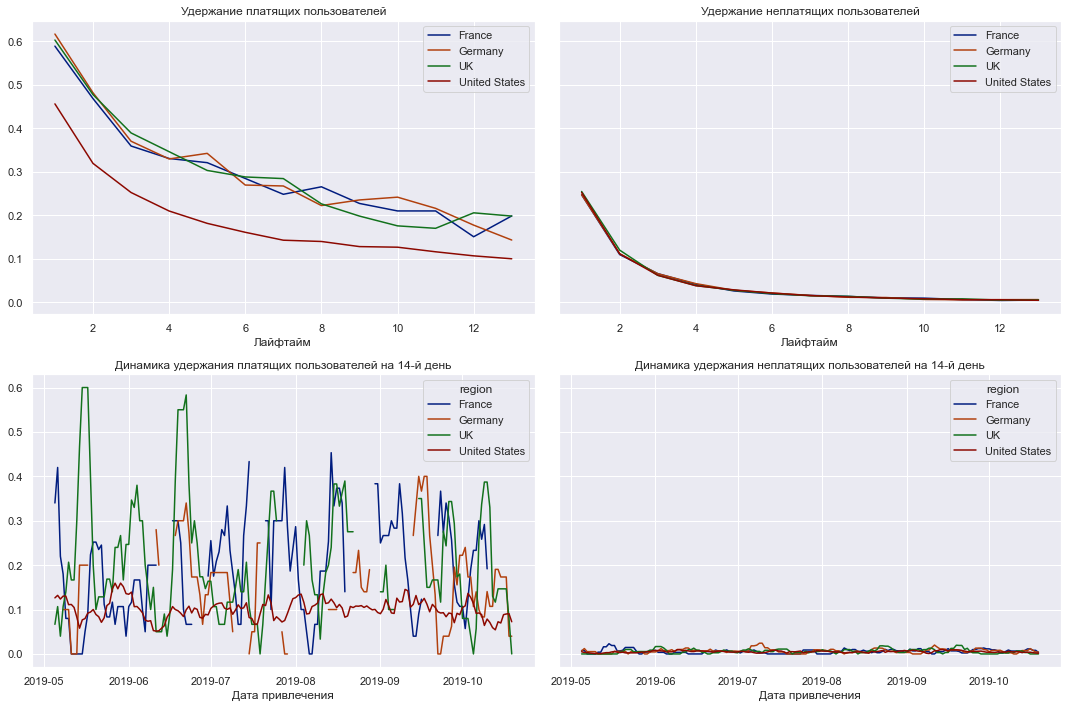

In [46]:
#Расчитаем удержание
retention_raw, retention, retention_history = get_retention(profiles, visits, 
                                                            observation_date, analysis_horizon, dimensions=['region'])
plot_retention(retention, retention_history, 14, window=5) 

D:\anacondas\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


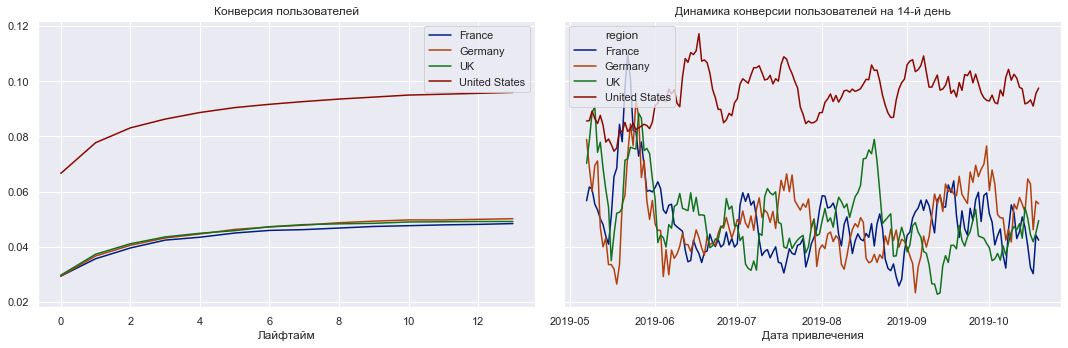

In [47]:
#Расчитаем конверсию 
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions = ['region']
)
plot_conversion(conversion, conversion_history, analysis_horizon, window=7) 

#### Вывод
Удержание платящих пользователей в США меньше чем в других странах. Это коррелирует с предыдущими выводами
Однако при этом, у США очень хороший показатель конверсии. Нужно обратить внимание на причины плохого удержания пользователей именно в США

#### Задача 8. Проанализируем удержание и конверсию в разбивке по устройствам

D:\anacondas\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


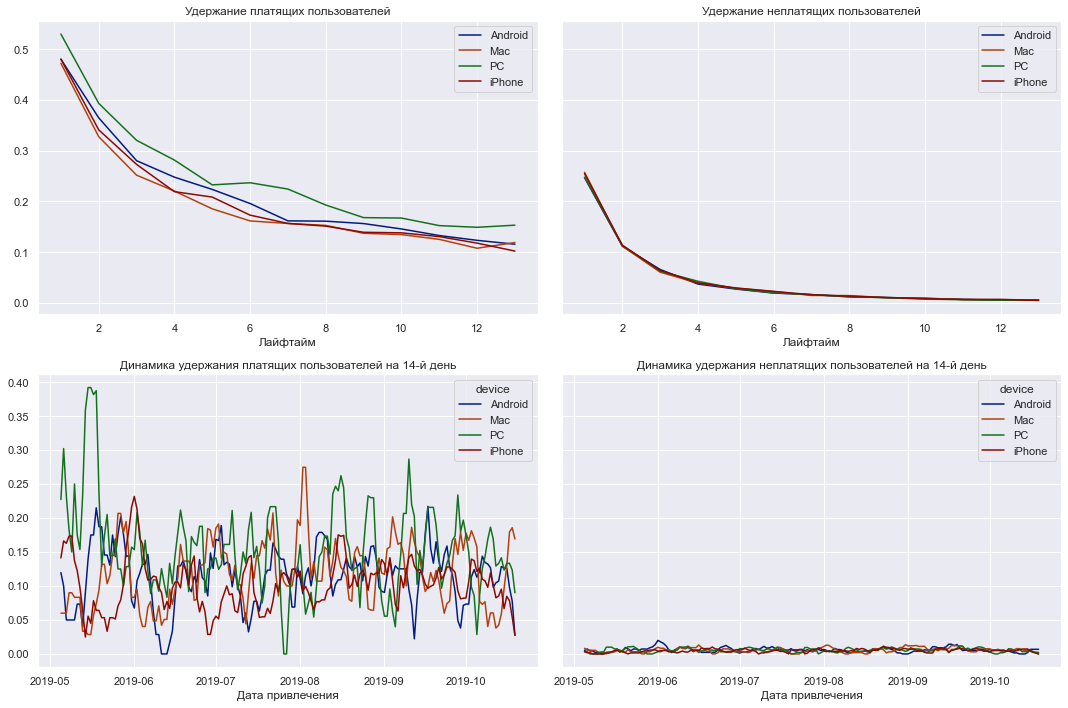

In [48]:
#Расчитаем удержание
retention_raw, retention, retention_history = get_retention(profiles, visits, 
                                                            observation_date, analysis_horizon, dimensions=['device'])
plot_retention(retention, retention_history, 14, window=5) 

D:\anacondas\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


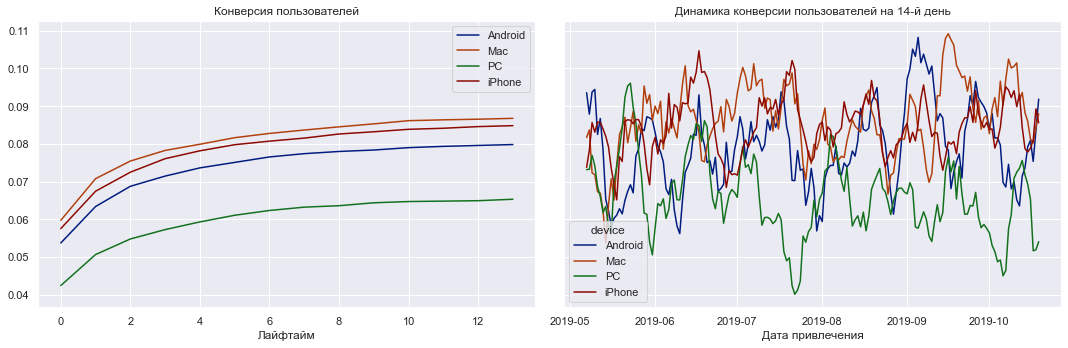

In [49]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions = ['device']
)
plot_conversion(conversion, conversion_history, analysis_horizon, window=7) 

#### Вывод
Проблем с удержанием платящих пользователей по устройствам нет
Так же у Iphone, Mac, Android самая высокая конверсия, а самая маленькая на PC.

### Общие выводы по пункту 6


Как мы можем увидеть что общая стоимость привлечения пользователя растет с каждым месяцем, при этом окупаемость пользователя на период 14 дней уже в июле падает ниже окупаемости.
Общий ROI не доходит до единицы что говорит о том, что реклама не окупается

TipTop - причина по которой стоимость привлечения растет каждый месяц, при этом реклама на FaceBoom, TipTop, AdNonSense не окупается, учитывая затраты на TipTop он и тянет весь маркетинг за собой.

Реклама начинает окупаться на конец лайфтайма пользователя только на PC. На остальных устройствах реклама не окупается, при этом стоимость привлечения пользователей для android, iphone, mac только растет

Мы видим, что реклама выросла именно по США и именно в этой стране реклама не окупается

Мы можем увидеть что удержание  платящих пользователей привлеченных через каналы FaceBoom и AdNonSence на уровне не платящих пользователей, что говорит о проблемах с трафиком привлеченном через эти каналы.
При этом несмотря на удержание у AdNonSence и FaceBoom хорошая конверсия. Так же хорошая конверсия у LambdaMediaAds. С учетом CAC и удержания это потенциально хороший канал. Так же надо поработать с конверсией органического трафика.

Удержание платящих пользователей в США меньше чем в других странах. Это коррелирует с предыдущими выводами
Однако при этом, у США очень хороший показатель конверсии. Нужно обратить внимание на причины плохого удержания пользователей именно в США

Проблем с удержанием платящих пользователей по устройствам нет
Так же у Iphone, Mac, Android самая высокая конверсия, а самая маленькая на PC.

### 7. Общие выводы

Исходя из вышеизложенного, реклама не окупается по следующим каналам FaceBoom, TipTop, AdNonSense. При этом FaceBoom и TipTop это самая дорогостоящая реклама с точки зрения бюджета. А у TipTop CAC в два раза больше чем у FaceBoom.
Необходимо оптимизировать затраты на рекламу по каналу TipTop, а так же обратить внимание на удержание у FaceBoom это потенциально отличный канал с хорошим CAC и конверсией, однако удержание на уровне удержания неплатящих пользователей. Такая же проблема с AdNonSense, это так же потенциально хороший канал.

Так же есть проблема с рекламой в США. Несмотря на хорошую конверсию и число пользователей только в данной ROI меньше единицы. В США удержание пользователей меньше чем в любой другой стране, а это значит, что они с покупают продукт один раз и после этого с меньшей вероятностью продолжают использовать его.
Отказываться от этого рынка нет смысла, нужно проработать вопрос с причинами оттока пользователей, проанализировав их активность в приложении и пользовательские отзывы.

У нас много органического трафика, но при этом маленькая конверсия. Нужно подумать над методами улучшения конверсии для органического трафика.

Стоит так же обратить внимания, что окупается реклама только на PC, нужно проверить корректность работы приложения на мобильных устройствах